# Assess predictions

In [134]:
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score, balanced_accuracy_score, precision_score, recall_score
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef, log_loss, classification_report

import os
import json 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Input Output

In [128]:
# where the model folder is
input_folder  = '/Volumes/yokote.k/xgboost/resources/output/final_model_ver1/'

# where you want to plots and scores to be stored
output_folder = '/Volumes/yokote.k/xgboost/resources/output/final_model_ver1/' 

# where the decoder is
decoder_path = '/Volumes/yokote.k/xgboost/resources/output/final_model_ver1/decoder.json'

## Read the data

In [130]:
y_test = pd.read_csv(os.path.join(output_folder, "y_test.csv"))
y_pred = pd.read_csv(os.path.join(output_folder, "y_predicted.csv"))

with open(decoder_path) as json_file:
    decode = json.load(json_file)
    decode = {int(k):v for k,v in decode.items()}

## Assess which phenotype each phenotype are wrongly classified as

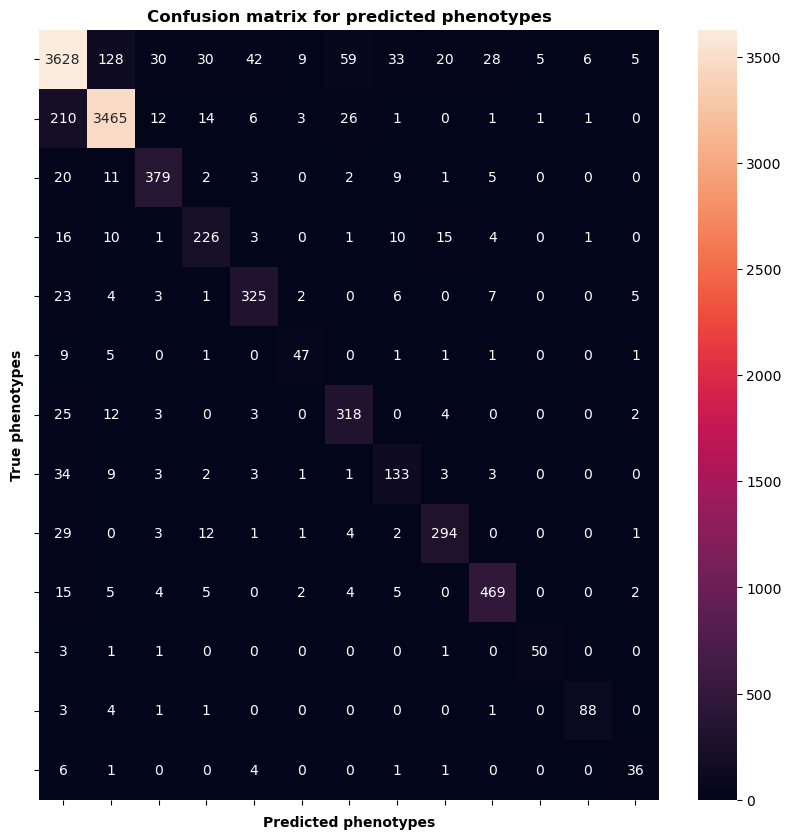

In [107]:
phenotypes = y_test.iloc[:, 0].unique()
phenotypes_string = [decode.get(str(x)) for x in phenotypes]

cm = confusion_matrix(y_test.iloc[:, 0], y_pred.iloc[:, 0])
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True,fmt='g')
plt.xticks(phenotypes + 0.5, phenotypes_string, rotation = 45)
plt.yticks(phenotypes + 0.5, phenotypes_string, rotation = 45)
plt.ylabel("True phenotypes", fontweight='bold')
plt.xlabel("Predicted phenotypes", fontweight='bold')
plt.title("Confusion matrix for predicted phenotypes", fontweight='bold')
plt.savefig(os.path.join(output_folder, 'cell_type_confusion_matrix.png'))

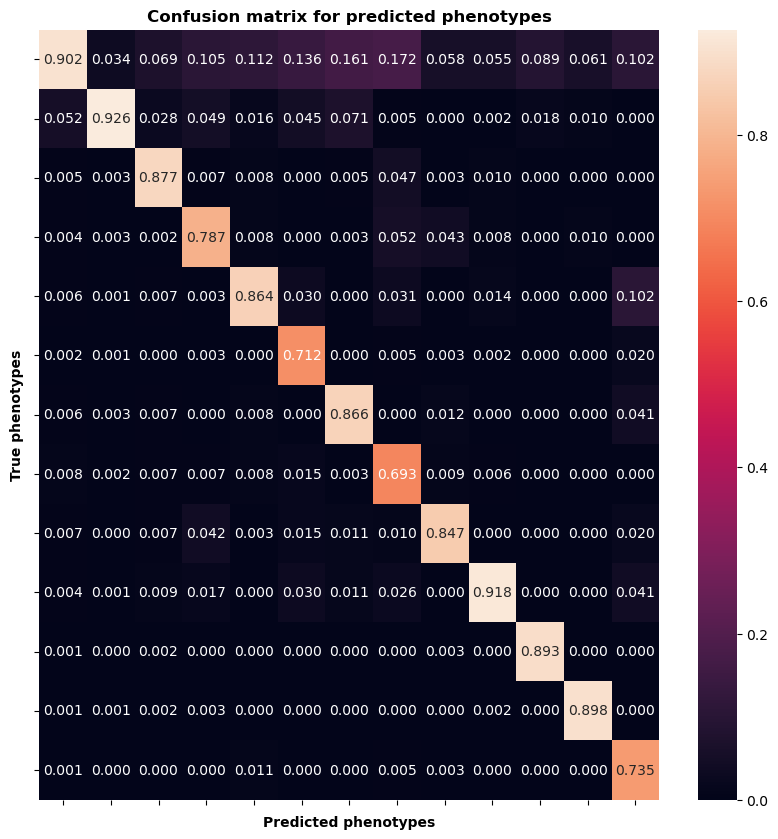

In [108]:
phenotypes = y_test.iloc[:, 0].unique()
phenotypes_string = [decode.get(str(x)) for x in phenotypes]

cm = confusion_matrix(y_test.iloc[:, 0], y_pred.iloc[:, 0])

cm = cm / cm.astype(float).sum(axis=1)
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True,fmt='.3f')
plt.xticks(phenotypes + 0.5, phenotypes_string, rotation = 45)
plt.yticks(phenotypes + 0.5, phenotypes_string, rotation = 45)
plt.ylabel("True phenotypes", fontweight='bold')
plt.xlabel("Predicted phenotypes", fontweight='bold')
plt.title("Confusion matrix for predicted phenotypes", fontweight='bold')
plt.savefig(os.path.join(output_folder, 'cell_type_confusion_matrix_normalised.png'))

## Per cell type scores

In [160]:
classification_report_ = classification_report(y_test, y_pred.iloc[:, 0], digits=5, output_dict=True)
classification_report_df = pd.DataFrame(classification_report_).T

In [162]:
classification_report_df.to_csv(os.path.join(output_folder, "per_class_report.csv"))

### Overall Scores

In [163]:
# overall accuracy
accuracy = accuracy_score(y_test, y_pred.iloc[:, 0])

# balanced accuracy
balanced_accuracy = balanced_accuracy_score(y_test, y_pred.iloc[:, 0])

# f1 score macro averaged
f1_macro = f1_score(y_test, y_pred.iloc[:, 0], average="macro")

# precision score macro averaged
precision_macro = precision_score(y_test, y_pred.iloc[:, 0], average="macro")

# recall score macro averaged
recall_macro = recall_score(y_test, y_pred.iloc[:, 0], average="macro")

# cohen kappa score
cohen_kappa =  cohen_kappa_score(y_test, y_pred.iloc[:, 0])

# matthews correlation 
matthews_correlation = matthews_corrcoef(y_test, y_pred.iloc[:, 0])

# log loss or cross entropy
log_loss_ = log_loss(y_test, y_pred.iloc[:, 1:(len(y_test.iloc[:, 0].unique())+1)])

overall_scores = pd.DataFrame(
    {"accuracy" : accuracy,
     "balanced_accuracy" : balanced_accuracy,
     "f1_macro" : f1_macro,
     "precision_macro" : precision_macro,
     "recall_macro" : recall_macro,
     "cohen_kappa" : cohen_kappa,
     "matthews_correlation" : matthews_correlation,
     "log_loss" : log_loss_}, index=[0]
)

overall_scores.to_csv(os.path.join(output_folder, "main_cell_types_overall_scores.csv"))


## Functional markers

In [165]:
"""
In a folder, put all of your outputs for the functional markers.

This will assume that you have a pattern as part of the name of the folder. 
eg.
NSCLCcohort_CD16,
NSCLCcohort_CD14,
etc.
"""

pattern = "NSCLCcohort_FM"

functional_marker_outputs_folder = "/Users/yokote.k/Desktop/MIBI/xgboost/resources/output/functional_markers_final_models"

In [168]:
functional_marker_folders = [folder for folder in os.listdir(functional_marker_outputs_folder) if pattern in folder]

In [169]:
functional_marker_folders

['NSCLCcohort_FM_Ki67_SMOTE_measurement_celltype',
 'NSCLCcohort_FM_train_CD206_TOMEK_all',
 'NSCLCcohort_FM_train_PD1_None_all_celltype',
 'NSCLCcohort_FM_train_CD103_SMOTETOMEK_all',
 'NSCLCcohort_FM_train_CD45RA_CD45RO_SMOTEENN_all_celltype',
 'NSCLCcohort_FM_train_CTLA4_ADASYN_CTLA4-3_am_ap_astd_data',
 'NSCLCcohort_FM_ICOS_SMOTE_all_measurements',
 'NSCLCcohort_FM_train_CD69_None_removed_11MH0979_stitched.tiff_am_ap_astd_data',
 'NSCLCcohort_FM_train_LAG3_TOMEK_LAG3_only_measurement_celltype',
 'NSCLCcohort_FM_train_CD49a_ADASYN_all',
 'NSCLCcohort_FM_train_CD16_None_am_ap_astd_data',
 'NSCLCcohort_FM_train_Tim3_ENN_all',
 'NSCLCcohort_FM_OX40_None_only_OX40',
 'NSCLCcohort_FM_train_CD14_None_all',
 'NSCLCcohort_FM_train_CD163_None_all_celltype',
 'NSCLCcohort_FM_train_MHC I (HLA Class1)_None_all',
 'NSCLCcohort_FM_train_IFN-y_None_am_ap_astd_data',
 'NSCLCcohort_FM_GrzB_None_measurement_celltype',
 'NSCLCcohort_FM_train_MHC II (HLA-DR)_None_all']

In [172]:
for folder in functional_marker_folders:
    y_test = pd.read_csv(os.path.join(functional_marker_outputs_folder, folder, "y_test.csv"))
    y_pred = pd.read_csv(os.path.join(functional_marker_outputs_folder, folder, "y_predicted.csv"))

    # overall accuracy
    accuracy = accuracy_score(y_test, y_pred.iloc[:, 0])

    # balanced accuracy
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred.iloc[:, 0])

    # f1 score macro averaged
    f1_macro = f1_score(y_test, y_pred.iloc[:, 0], average="macro")

    # precision score macro averaged
    precision_macro = precision_score(y_test, y_pred.iloc[:, 0], average="macro")

    # recall score macro averaged
    recall_macro = recall_score(y_test, y_pred.iloc[:, 0], average="macro")

    # cohen kappa score
    cohen_kappa =  cohen_kappa_score(y_test, y_pred.iloc[:, 0])

    # matthews correlation 
    matthews_correlation = matthews_corrcoef(y_test, y_pred.iloc[:, 0])

    # log loss or cross entropy
    log_loss_ = log_loss(y_test, y_pred.iloc[:, 1:(len(y_test.iloc[:, 0].unique())+1)])

    overall_scores = pd.DataFrame(
        {"accuracy" : accuracy,
        "balanced_accuracy" : balanced_accuracy,
        "f1_macro" : f1_macro,
        "precision_macro" : precision_macro,
        "recall_macro" : recall_macro,
        "cohen_kappa" : cohen_kappa,
        "matthews_correlation" : matthews_correlation,
        "log_loss" : log_loss_}, index=[0]
    )

    overall_scores.to_csv(os.path.join(output_folder, folder+"_overall_scores.csv"))